# Mini example of keyword selection

In [1]:
from src.keyword_generator_2 import KeywordGenerator
import os
import pathlib

from dotenv import load_dotenv, find_dotenv
from openai import OpenAI

import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np

In [2]:
kw_generator = KeywordGenerator(model='gpt-3.5-turbo')

In [3]:
w0 = 'living-lab'
n0 = 40
n1 = 100
key_list = []
keys = kw_generator.get_kwds(w0,n0)
key_list.append(keys)
kw_list = keys.replace("{","").replace("}","").replace("\n  ","").replace("\n ","").replace("\n","").replace(", ",",").split(',')
kwds_dict = {}
kwds_dict_s = {}
for w in kw_list:
    w_sp = w.split(":")
    kwds_dict[w_sp[0]] = int(w_sp[1])
    short = (w_sp[0]).replace(" ","").replace("-","")
    kwds_dict_s[short] = int(w_sp[1])
kwds = [kwds_dict]
kwds_s = [kwds_dict_s]


for w in kwds[0].keys():
    keys = kw_generator.get_kwds(w,n1)
    key_list.append(keys)
    kw_list = keys.replace("{","").replace("}","").replace("\n  ","").replace("\n ","").replace("\n","").replace(", ",",").split(',')
    print(kw_list)
    kwds_dict = {w:0}
    w_s = w.replace(" ","").replace("-","")
    kwds_dict_s = {w_s:0}

    for w1 in kw_list:
        w1_sp = w1.split(":")
        print(w1_sp)
        try:
            kwds_dict[w1_sp[0]] = int(w1_sp[1])
            short = (w1_sp[0]).replace(" ","").replace("-","")
            kwds_dict_s[short] = int(w1_sp[1])
        except Exception as e:
            print("An error occurred:", e)
            continue 
    kwds.append(kwds_dict)
    kwds_s.append(kwds_dict_s)
kwds[0] = {**{w0:0},**kwds[0]}
w0_s = w0.replace(" ","").replace("-","")
kwds_s[0] = {**{w0_s:0},**kwds_s[0]}

['study: 5', 'investigation: 4', 'analysis: 4', 'exploration: 4', 'inquiry: 4', 'experiment: 4', 'survey: 3', 'data collection: 3', 'observation: 3', 'examination: 3', 'scholarly: 3', 'academic: 3', 'findings: 3', 'discovery: 3', 'research paper: 3', 'methodology: 3', 'literature review: 3', 'research design: 3', 'research question: 3', 'research methods: 3', 'research study: 3', 'research findings: 3', 'research process: 3', 'research project: 3', 'research analysis: 3', 'research field: 3', 'research topic: 3', 'research area: 3', 'research investigation: 3', 'research outcomes: 3', 'research results: 3', 'research approach: 3', 'research framework: 3', 'research tools: 3', 'research techniques: 3', 'research methodology: 3', 'research ethics: 3', 'research impact: 3', 'research scope: 3', 'research objectives: 3', 'research challenges: 3', 'research trends: 3', 'research opportunities: 3', 'research implications: 3', 'research analysis: 3', 'research evaluation: 3', 'research valida

In [4]:
w1

''

In [5]:
kwds_s,kwds

([{'livinglab': 0,
   'research': 5,
   'innovation': 4,
   'collaboration': 4,
   'usercentered': 4,
   'experimentation': 4,
   'cocreation': 4,
   'technology': 3,
   'sustainability': 3,
   'community': 3,
   'participatory': 3,
   'design': 3,
   'testing': 3,
   'feedback': 2,
   'urban': 2,
   'environment': 2,
   'interaction': 2,
   'engagement': 2,
   'prototype': 2,
   'evaluation': 2,
   'implementation': 2,
   'experience': 2,
   'workshop': 2,
   'methodology': 2,
   'data': 2,
   'analysis': 2,
   'monitoring': 2,
   'iteration': 2,
   'solution': 2,
   'development': 2,
   'userexperience': 2,
   'digital': 1,
   'platform': 1,
   'smartcity': 1,
   'sensor': 1,
   'internetofthings': 1,
   'pilot': 1,
   'ecosystem': 1,
   'policy': 1,
   'impact': 1},
  {'research': 0,
   'study': 5,
   'investigation': 4,
   'analysis': 4,
   'exploration': 4,
   'inquiry': 4,
   'experiment': 4,
   'survey': 3,
   'datacollection': 3,
   'observation': 3,
   'examination': 3,
   'sc

In [10]:
count = []
for kw_dictionary in kwds_s:
    t = 'livinglabÇ' in list(kw_dictionary.keys())
    count.append(t*1.)
sum(count)

0.0

In [11]:
G = nx.DiGraph()
for kw_dict in kwds_s:
    for i,(k,v) in enumerate(kw_dict.items()):
        origin = list(kw_dict.keys())[0]
        if i>0:
            G.add_edge(origin,k,weight=v)


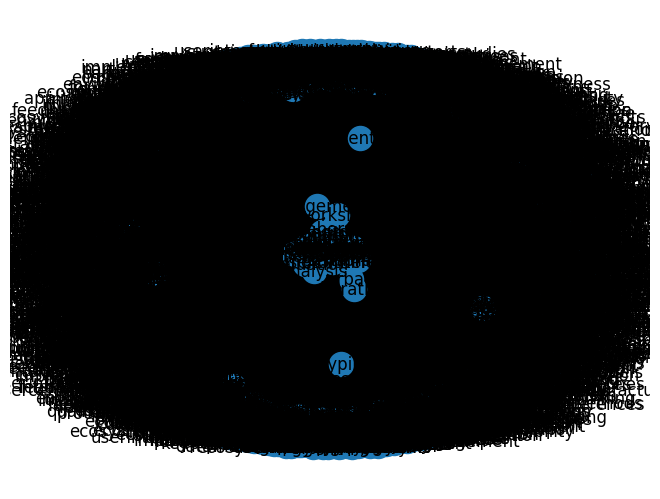

In [12]:
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, width=edge_widths)

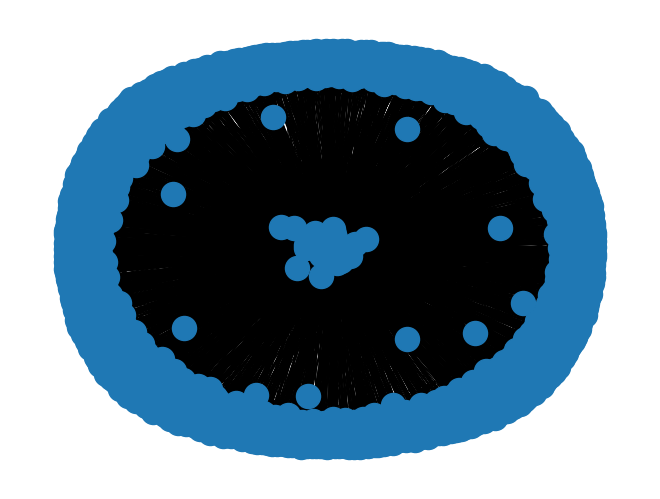

In [13]:
nx.draw(G)

In [13]:
personalization = {node: 0 for node in G.nodes()} 
personalization['livinglab'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

[('livinglab', 0.38428463816660574),
 ('research', 0.019164019192642892),
 ('innovation', 0.015869816619377062),
 ('collaboration', 0.01550606439757521),
 ('experimentation', 0.015085049376295706),
 ('usercentered', 0.015039226190754908),
 ('cocreation', 0.014870966402246881),
 ('design', 0.011923683058998106),
 ('community', 0.011903328481994392),
 ('testing', 0.011616950780985028),
 ('sustainability', 0.011564651765262009),
 ('technology', 0.011510455418037023),
 ('participatory', 0.01115322480168516),
 ('userexperience', 0.008415740965496955),
 ('engagement', 0.008316138894921544),
 ('analysis', 0.008254496363390703),
 ('development', 0.00818094528097431),
 ('interaction', 0.008108676877700595),
 ('feedback', 0.008075227098965543),
 ('methodology', 0.007917441626246666),
 ('data', 0.007888594451073871),
 ('experience', 0.007861359510626472),
 ('environment', 0.007760104423042168),
 ('iteration', 0.00773579644939354),
 ('implementation', 0.007623836338156768),
 ('monitoring', 0.00755